In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# read the output from xml2csv call to a pandas dataframe
import subprocess
xml_2_csv_call = """python "%SUMO_HOME%\\tools\\xml\\xml2csv.py" outputs\\dynamic_vehicle_data\\dynamic_vehicle_data.xml -s ," """
subprocess.run(xml_2_csv_call, shell=True)

CompletedProcess(args='python "%SUMO_HOME%\\tools\\xml\\xml2csv.py" outputs\\dynamic_vehicle_data\\dynamic_vehicle_data.xml -s ," ', returncode=0)

In [36]:
# Load the CSV data for static TL
df_static = pd.read_csv("outputs/static_vehicle_data/processed_static_vehicle_data.csv")
df_dynamic = pd.read_csv("outputs/dynamic_vehicle_data/dynamic_vehicle_data.csv")

# Remove trailing spaces in column names
df_static.columns = df_static.columns.str.strip()
df_dynamic.columns = df_dynamic.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_static = df_static[(df_static['data_timestep'] >= 900) & (df_static['data_timestep'] <= 4500)]
df_dynamic = df_dynamic[(df_dynamic['data_timestep'] >= 900) & (df_dynamic['data_timestep'] <= 4500)]

In [37]:
df_static['lane_queueing_length_experimental'] = pd.to_numeric(df_dynamic['lane_queueing_length_experimental'], errors='coerce')
df_static = df_static.dropna(subset=['lane_queueing_length_experimental'])

df_dynamic['lane_queueing_length_experimental'] = pd.to_numeric(df_dynamic['lane_queueing_length_experimental'], errors='coerce')
df_dynamic = df_dynamic.dropna(subset=['lane_queueing_length_experimental'])

In [38]:
# Aggregate data: average and max queue lengths by timestep
agg_data = df_static.groupby('data_timestep').agg({'lane_queueing_length_experimental': ['mean', 'max']}).reset_index()
agg_data.columns = ['data_timestep', 'avg_queue_length', 'max_queue_length']

agg_data = df_dynamic.groupby('data_timestep').agg({'lane_queueing_length_experimental': ['mean', 'max']}).reset_index()
agg_data.columns = ['data_timestep', 'avg_queue_length', 'max_queue_length']

In [39]:
# Select top 5 lanes with highest average queue lengths
lane_avg = df_static.groupby('lane_id')['lane_queueing_length_experimental'].mean().sort_values(ascending=False)
lane_avg = df_dynamic.groupby('lane_id')['lane_queueing_length_experimental'].mean().sort_values(ascending=False)

top_lanes = [" CMB_to_KBJ_001_1", " CMB_to_KBJ_001_2", " CMB_to_KBJ_001_3", " CMB_to_KBJ_001_4", 
             " MRT_to_KB_001.37_2", " MRT_to_KB_001.37_3", " MRT_to_KB_001.37_4", " MRT_to_KB_001.37_5", 
             " P_to_KBJ_1", " P_to_KBJ_2"]
##top_lanes = lane_avg.head(10).index.tolist()

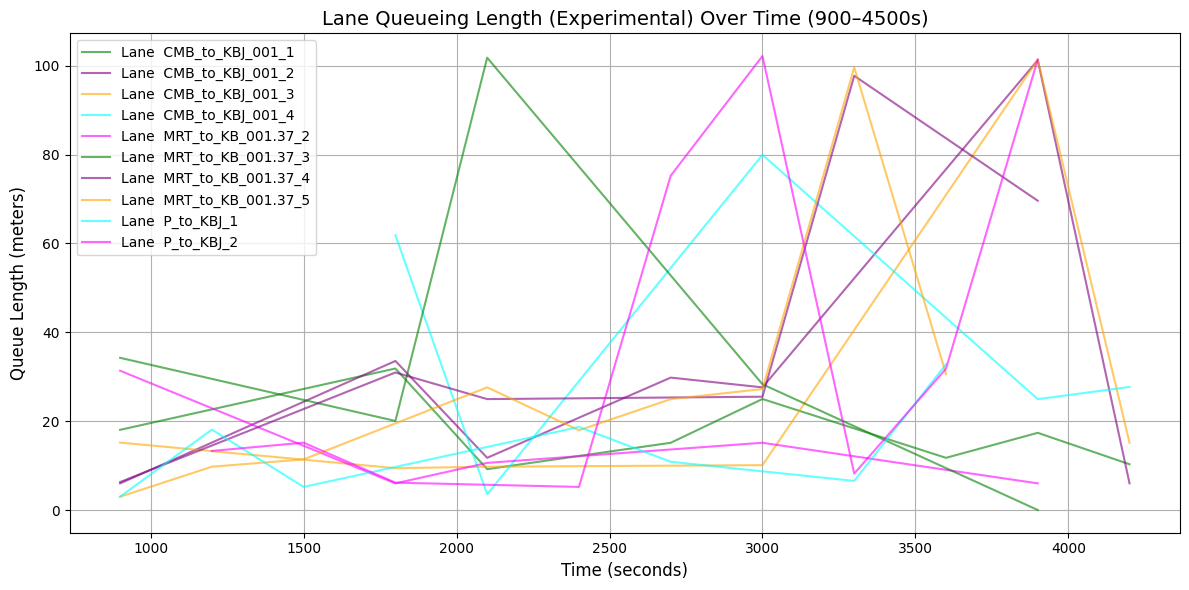

In [40]:
# Create plot
plt.figure(figsize=(12, 6))

# Plot top lanes
colors = ['green', 'purple', 'orange', 'cyan', 'magenta']
for i, lane in enumerate(top_lanes):
    lane_data = df_static[df_static['lane_id'] == lane][['data_timestep', 'lane_queueing_length_experimental']]
    plt.plot(lane_data['data_timestep'], lane_data['lane_queueing_length_experimental'], 
             label=f'Lane {lane}', color=colors[i % len(colors)], alpha=0.6)

# Customize plot
plt.title('Lane Queueing Length (Experimental) Over Time (900–4500s)', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

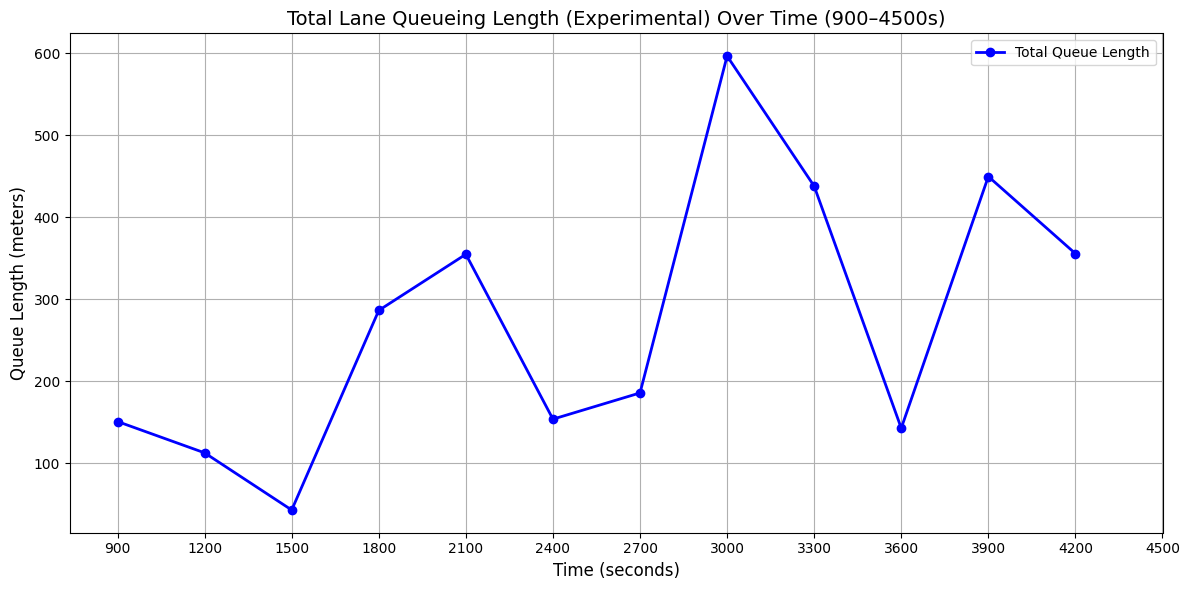

In [41]:
total_queue_length = df_static.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length['data_timestep'], total_queue_length['lane_queueing_length_experimental'], label='Total Queue Length', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length (Experimental) Over Time (900–4500s)', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

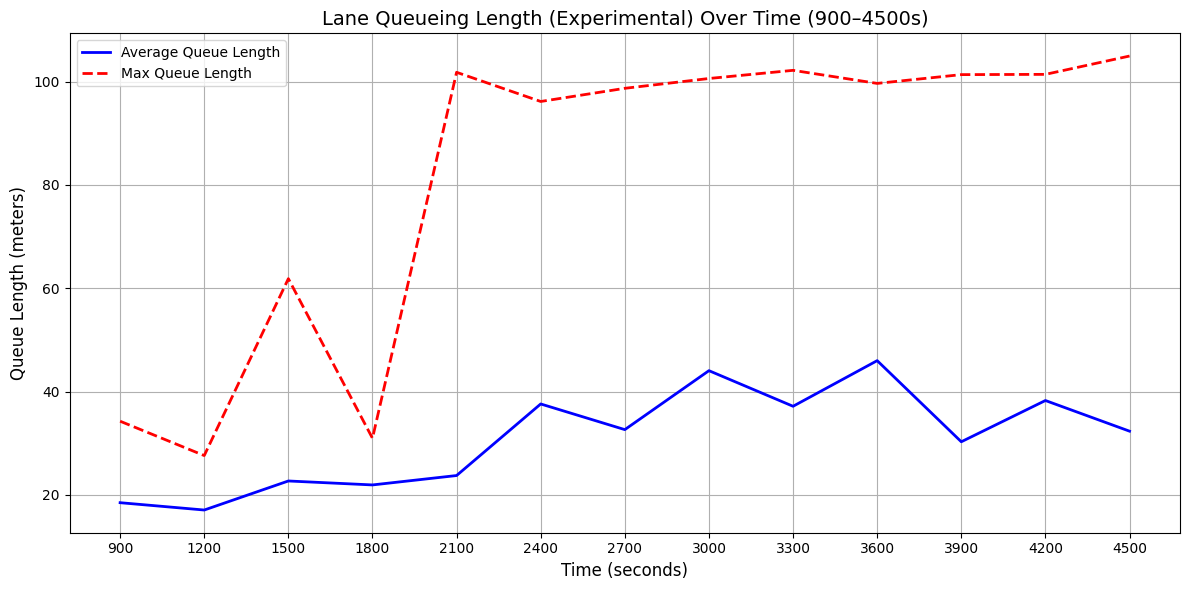

In [42]:
plt.figure(figsize=(12, 6))

plt.plot(agg_data['data_timestep'], agg_data['avg_queue_length'], label='Average Queue Length', color='blue', linewidth=2)
plt.plot(agg_data['data_timestep'], agg_data['max_queue_length'], label='Max Queue Length', color='red', linestyle='--', linewidth=2)

# Customize plot
plt.title('Lane Queueing Length (Experimental) Over Time (900–4500s)', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

Dynamic Plots

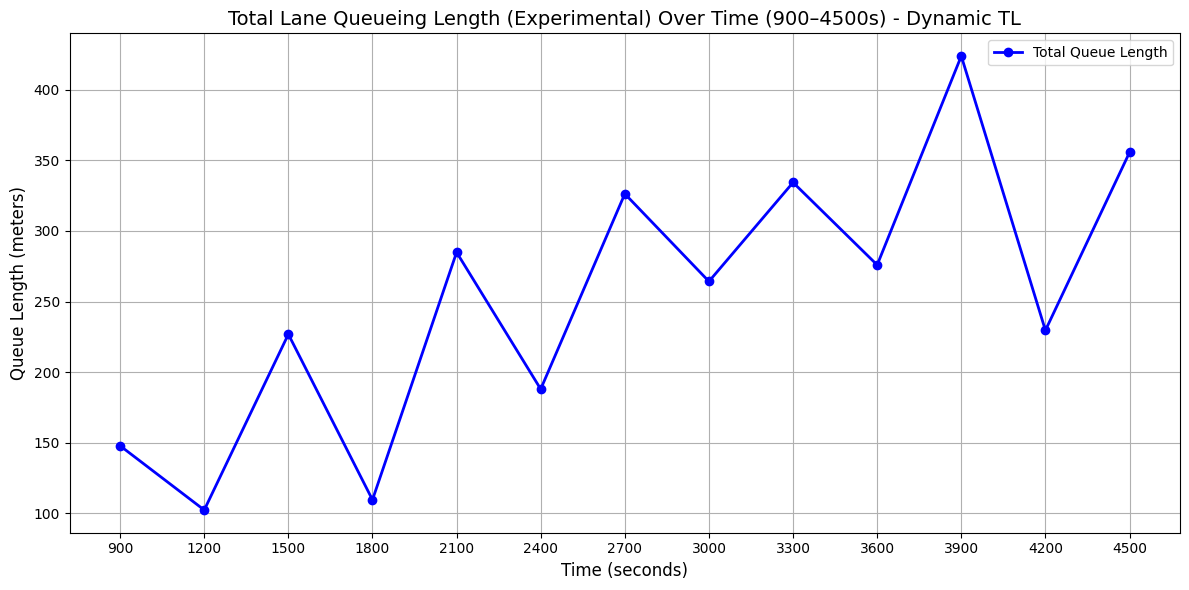

In [ ]:
total_queue_length = df_dynamic.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length['data_timestep'], total_queue_length['lane_queueing_length_experimental'], label='Total Queue Length', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length (Experimental) Over Time (900–4500s) - Dynamic TL', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()


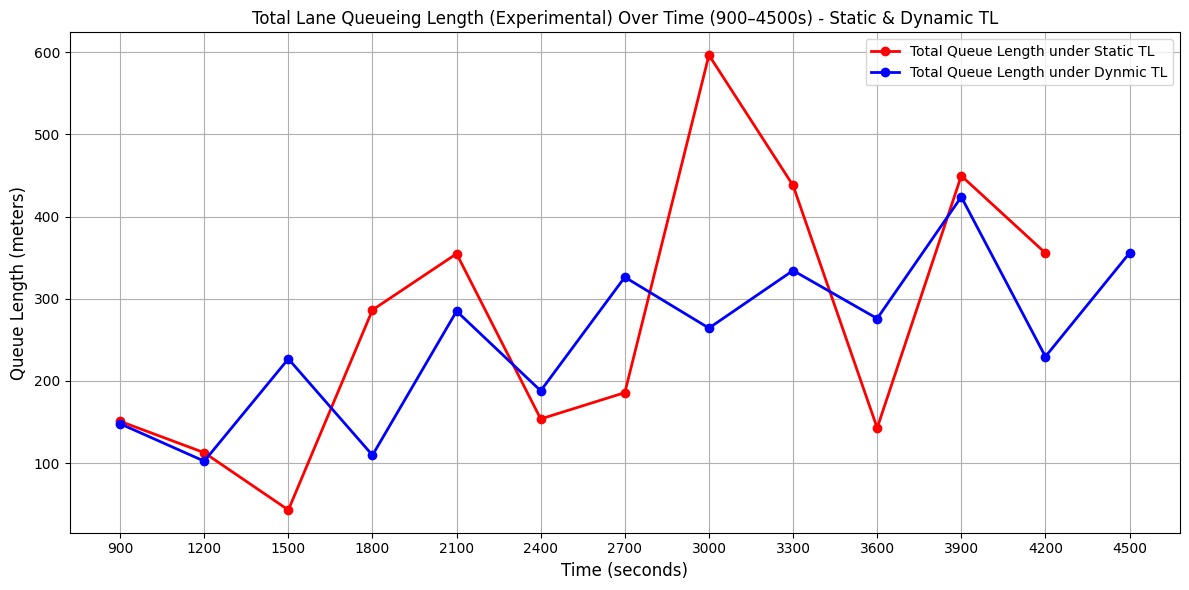

In [45]:
total_queue_length_dynamic = df_dynamic.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()
total_queue_length_static = df_static.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_static['data_timestep'], total_queue_length_static['lane_queueing_length_experimental'], label='Total Queue Length under Static TL', marker='o', color='red', linewidth=2)
plt.plot(total_queue_length_dynamic['data_timestep'], total_queue_length_dynamic['lane_queueing_length_experimental'], label='Total Queue Length under Dynmic TL', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length (Experimental) Over Time (900–4500s) - Static & Dynamic TL', fontsize=12)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()